# Problem 4

## Part (a)

Use JuMP to Solve the Portfolio Selection Problem.  This can be found on pages 9 to 11 of Chapter 1 (Revised) of Applied Mathematical Programming. It is available at [this link](https://canvas.mit.edu/files/1133932/download?download\_frd=1).

Here are guidelines for solving the problem.
- Your decision variables should be $x[1:5]$ and $y$.
- Use the file Portfolio1.csv, which is provided with this problem set.   You may remove the header row if you wish.
- In Julia, create the following two variables.  `Avg_quality` = 1.4;  `Avg_years_to_maturity` = 5.   These variables are not decision variables.  Rather, they will be treated as constants in the JuMP model.   (We will change the values of these three constants in the next part and ask you to resolve the problem.)
- Express the ratio constraints using the above two Julia variables, each of which will be treated by JuMP as a constant.  The denominator of each of the ratio constraints will be $y$.

First, let's import the data into the environment.

In [1]:
## if you have not installed package "CSV", please uncomment the line below and execute it
# using Pkg; Pkg.add("CSV")
using DataFrames, CSV
portfolio = CSV.read("Portfolio1.csv", DataFrame)

,Bond name,Bond Type,Moody's rating,Bank's rating,Years to maturity,Yield to maturity %
,String,String,String,Int64,Int64,Float64
1,A,Municipal,Aa,2,9,4.3
2,B,Agency,Aa,2,15,5.4
3,C,Government,Aaa,1,4,5.0
4,D,Government,Aaa,1,3,4.4
5,E,Municipal,Ba,5,2,4.5


Now, please write Julia/JuMP codes in the cell below to describe this problem.

In [2]:
using JuMP, Gurobi

# New variables for average quality of the portfolio and the average years to maturity
Avg_quality = 1.4
Avg_years_to_maturity = 5

# Initializing a model "m" using the Gurobi Optimizer
m = Model(with_optimizer(Gurobi.Optimizer))


# Decision Variables 

# Decision variables represent each of the 5 Bonds(x[1]...x[5]) in addition to the variable y,representing amount borrowed in millions of dollars. 
# Non-negativity constraints are inserted here!
@variables m begin
    x[1:5] >= 0
    y >= 0
end


#Objective Function

# Goal: Maximize after-tax earnings
optimal_objective = x[1]*0.043 + x[2]*0.027 + x[3]*0.025 + x[4]*0.022 + x[5]*0.045 - 0.0275*y

@objective(m,Max,optimal_objective)



# Constraints

all_bonds_investments = x[1] + x[2] + x[3] + x[4] + x[5]

# Total Money To Invest (Max 10 million dollars + amount borrowed)
@constraint(m,all_bonds_investments <= 10 + y)

# Government and Agency Bonds Constraint (Atleast 4 million dollars)
# x[2],x[3], and x[4] represent government and agencies bonds
@constraint(m,x[2] + x[3] + x[4] >= 4)

# Average Quality of Portfolio (Atleast Avg_quality(1.4))
@constraint(m,2*x[1] + 2*x[2] + 1*x[3] + 1*x[4] + 5*x[5] <= (Avg_quality  * all_bonds_investments))

# Average Maturity of Portfolio (max Avg_years_to_maturity(5))
@constraint(m,9*x[1] + 15*x[2] + 4*x[3] + 3*x[4] + 2*x[5] <= (Avg_years_to_maturity * all_bonds_investments))

# Max of Borrowing Up To 1 Million Dollars
@constraint(m,y <= 1)

Academic license - for non-commercial use only - expires 2021-04-24


y ≤ 1.0

Next, you should solve the problem using Gurobi as the solver and print the answer.

In [3]:
optimize!(m)

# Showing the optimal investments for the 5 bonds and the optimal amount to borrow(y)
@show value(x[1]);
@show value(x[2]);
@show value(x[3]);
@show value(x[4]);
@show value(x[5]);
@show value(y);

# Showing the optimal after-tax earnings
@show objective_value(m);

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 6 columns and 20 nonzeros
Model fingerprint: 0xad9045fc
Coefficient statistics:
  Matrix range     [4e-01, 1e+01]
  Objective range  [2e-02, 4e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 4 rows, 6 columns, 19 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1489187e+00   9.429646e+00   0.000000e+00      0s
       2    3.0070000e-01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.00 seconds
Optimal objective  3.007000000e-01

User-callback calls 33, time in user-callback 0.01 sec
value(x[1]) = 2.3999999999999995
value(x[2]) = 0.0
value(x[3]) = 8.100000000000001
value(x[4]) = 0.0
value(x[5]) = 0.4999999999999991
value(y) = 1.0
objective_value(m) = 0.30069999999999997


## Part (b)

Solve the problem 10 more times including the following changes in the constants.  

1. `Avg_quality` = 1.1, 1.2, 1.3, 1.4, and 1.5 with all other data being the original data. 
2. `Avg_years_to_maturity` = 3.5, 4.0, 4.5, 5.0 and 5.5, with all other data being the original data.

In the cell below, please write Julia/JuMP codes to solve these problems. You can add more cells below if needed.

In [4]:
using JuMP, Gurobi

# New variables for the variable choices of average quality of the portfolio and the fixed average years to maturity
Avg_quality_choices = [1.1,1.2,1.3,1.4,1.5]
Avg_years_to_maturity = 5

# Initializing an array to store all of the optimal solutions when changing the average quality 
optimal_solutions_quality = [0.0,0.0,0.0,0.0,0.0,0.0]

for (index,value) in enumerate(Avg_quality_choices)

    # Initializing a model "new_model" using the Gurobi Optimizer
    new_model = Model(with_optimizer(Gurobi.Optimizer))

    
    # Decision Variables 

    # Decision variables represent each of the 5 Bonds(x[1]...x[5]) in addition to the variable y,representing amount borrowed in millions of dollars. 
    # Non-negativity constraints are inserted here!

    @variables new_model begin
        x[1:5] >= 0
        y >= 0
    end
    
    #The average quality of the portfolio changes!
    Avg_quality = value
    
    #The average years to maturity stays the same here while the quality changes
    Avg_years_to_maturity = Avg_years_to_maturity


    #Objective Function

    # Goal: Maximize after-tax earnings
    optimal_objective = x[1]*0.043 + x[2]*0.027 + x[3]*0.025 + x[4]*0.022 + x[5]*0.045 - 0.0275*y

    @objective(new_model,Max,optimal_objective)


    # Constraints

    all_bonds_investments = x[1] + x[2] + x[3] + x[4] + x[5]

    # Total Money To Invest (Max 10 million dollars + amount borrowed)
    @constraint(new_model,money_invest, all_bonds_investments <= 10 + y)

    # Government and Agency Bonds Constraint (Atleast 4 million dollars)
    # x[2],x[3], and x[4] represent government and agencies bonds
    @constraint(new_model,gov_agency, x[2] + x[3] + x[4] >= 4)

    # Average Quality of Portfolio (Atleast Avg_quality(1.4))
    @constraint(new_model,quality,2*x[1] + 2*x[2] + 1*x[3] + 1*x[4] + 5*x[5] <= (Avg_quality  * all_bonds_investments))

    # Average Maturity of Portfolio (max Avg_years_to_maturity(5))
    @constraint(new_model,maturity,9*x[1] + 15*x[2] + 4*x[3] + 3*x[4] + 2*x[5] <= (Avg_years_to_maturity * all_bonds_investments))

    # Max of Borrowing Up To 1 Million Dollars
    @constraint(new_model,borrow_max,y <= 1)

    optimize!(new_model)

    #Storing the optimal solution value for this particular average quality value
    intermediate_quality_solution = objective_value(new_model)
    optimal_solutions_quality[index+1] = intermediate_quality_solution
end

# Deleting the extra 0 in the beginning
deleteat!(optimal_solutions_quality, 1)

# Showing the optimal solutions from average quality = 1.1, 1.2, 1.3,1.4,and 1.5
@show optimal_solutions_quality

Academic license - for non-commercial use only - expires 2021-04-24
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 6 columns and 20 nonzeros
Model fingerprint: 0x031570b5
Coefficient statistics:
  Matrix range     [1e-01, 1e+01]
  Objective range  [2e-02, 4e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 4 rows, 6 columns, 19 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.2278978e-01   3.617778e+00   0.000000e+00      0s
       1    2.6800000e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds
Optimal objective  2.680000000e-01

User-callback calls 33, time in user-callback 0.00 sec
Academic license - for non-commercial use only - expires 2021-04-24
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread

5-element Array{Float64,1}:
 0.268
 0.28709999999999997
 0.2939
 0.30069999999999997
 0.3075

In [5]:
using JuMP, Gurobi

# New variables for the fixed average quality of the portfolio and the variable average years to maturity
Avg_quality = 1.4
Avg_years_to_maturity = [3.5,4.0,4.5,5.0,5.5]

# Initializing an array to store all of the optimal solutions when changing the average years to maturity 
optimal_solutions_maturity = [0.0,0.0,0.0,0.0,0.0,0.0]

for (index,value) in enumerate(Avg_years_to_maturity)

    # Initializing a model "new_model" using the Gurobi Optimizer
    new_model = Model(with_optimizer(Gurobi.Optimizer))

    
    # Decision Variables 

    # Decision variables represent each of the 5 Bonds(x[1]...x[5]) in addition to the variable y,representing amount borrowed in millions of dollars. 
    # Non-negativity constraints are inserted here!
    
    @variables new_model begin
        x[1:5] >= 0
        y >= 0
    end
    
    # Average quality stays the same
    Avg_quality = Avg_quality
    
    # Average years to maturity changes!
    Avg_years_to_maturity = value


    #Objective Function

    # Goal: Maximize after-tax earnings
    optimal_objective = x[1]*0.043 + x[2]*0.027 + x[3]*0.025 + x[4]*0.022 + x[5]*0.045 - 0.0275*y

    @objective(new_model,Max,optimal_objective)


    # Constraints

    all_bonds_investments = x[1] + x[2] + x[3] + x[4] + x[5]

    # Total Money To Invest (Max 10 million dollars + amount borrowed)
    @constraint(new_model,money_invest, all_bonds_investments <= 10 + y)

    # Government and Agency Bonds Constraint (Atleast 4 million dollars)
    # x[2],x[3], and x[4] represent government and agencies bonds
    @constraint(new_model,gov_agency, x[2] + x[3] + x[4] >= 4)

    # Average Quality of Portfolio (Atleast Avg_quality(1.4))
    @constraint(new_model,quality,2*x[1] + 2*x[2] + 1*x[3] + 1*x[4] + 5*x[5] <= (Avg_quality  * all_bonds_investments))

    # Average Maturity of Portfolio (max Avg_years_to_maturity(5))
    @constraint(new_model,maturity,9*x[1] + 15*x[2] + 4*x[3] + 3*x[4] + 2*x[5] <= (Avg_years_to_maturity * all_bonds_investments))

    # Max of Borrowing Up To 1 Million Dollars
    @constraint(new_model,borrow_max,y <= 1)

    optimize!(new_model)

    #Storing the optimal solution value for this particular average years to maturity value
    intermediate_solution_maturity = objective_value(new_model)
    optimal_solutions_maturity[index+1] = intermediate_solution_maturity
end

# Deleting the extra 0 in the beginning
deleteat!(optimal_solutions_maturity, 1)

# Showing the optimal solutions from average years to maturity = 3.5, 4.0, 4.5,5.0,and 5.5
@show optimal_solutions_maturity

Academic license - for non-commercial use only - expires 2021-04-24
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 6 columns and 20 nonzeros
Model fingerprint: 0xdbd06a66
Coefficient statistics:
  Matrix range     [4e-01, 1e+01]
  Objective range  [2e-02, 4e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 4 rows, 6 columns, 19 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1489187e+00   2.978433e+01   0.000000e+00      0s
       3    2.6100000e-01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.00 seconds
Optimal objective  2.610000000e-01

User-callback calls 35, time in user-callback 0.00 sec
Academic license - for non-commercial use only - expires 2021-04-24
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread

5-element Array{Float64,1}:
 0.261
 0.27472727272727276
 0.28769999999999996
 0.30069999999999997
 0.3136999999999999

Graph the optimal solution value as the average quality changes. Please write Julia code in the cell below to make the graph.


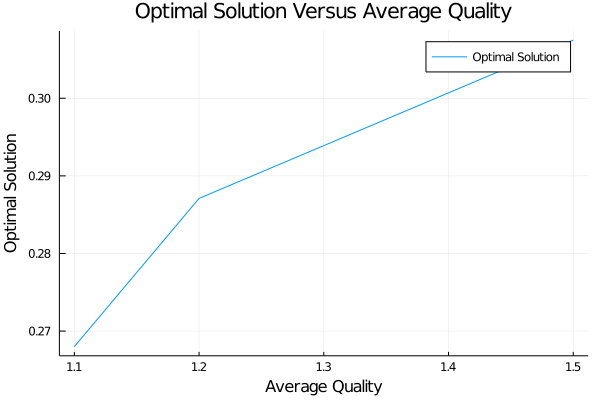

In [6]:
using Plots

# Labeling the X-Axis 
x_axis = [1.1,1.2,1.3,1.4,1.5]

# Getting the optimal solutions for the different changes of average quality
quality_data = optimal_solutions_quality
plot(x_axis, label= "Optimal Solution",quality_data, title = "Optimal Solution Versus Average Quality", xlabel= "Average Quality", ylabel = "Optimal Solution", xticks=x_axis)


Graph the optimal solution value as the average years to maturity changes. Please write Julia code in the cell below to make the graph.

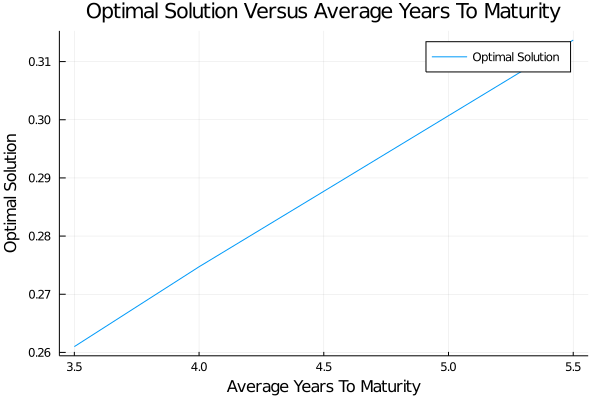

In [7]:
using Plots

# Labeling the X-Axis 
x_axis = [3.5,4.0,4.5,5.0,5.5]

# Getting the optimal solutions for the different changes of average years to maturity
maturity_data = optimal_solutions_maturity
plot(x_axis, label= "Optimal Solution",maturity_data, title = "Optimal Solution Versus Average Years To Maturity", xlabel= "Average Years To Maturity", ylabel = "Optimal Solution", xticks=x_axis)

In the PDF writeup, describe: Are the graphs convex?  Are they concave? Is this intuitive to you?  
Briefly explain. (Please use Gurobi as the solver, and use the Plots or StatsPlots packages for graphing.)